<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana13/AjustesPoissonHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial

In [2]:
def Likelihood(mu,n,b,s):

  l = mu*s+b

  return np.exp(-l)*l**n/factorial(n)

In [13]:
n = np.array([1.,1.])
b = np.array([0.,0.])
s = np.array([1.,1.])

In [14]:
mu = np.linspace(0,4,50)
Like = Likelihood(mu,n[0],b[0],s[0])*Likelihood(mu,n[1],b[1],s[1])

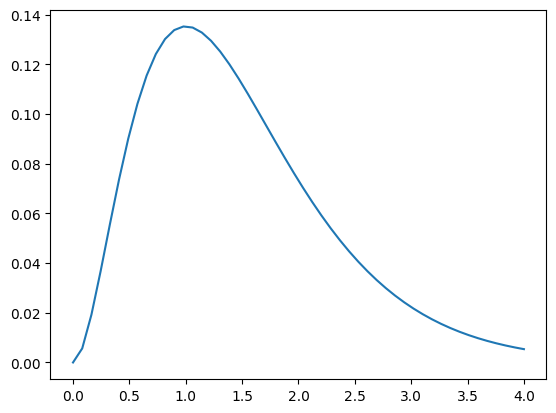

In [15]:
plt.plot(mu,Like)